In [1]:
%pip install opencv-contrib-python
%pip install imutils
%pip install cvlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import cv2
import glob
from imutils.video import VideoStream
from imutils.video import FPS
from imutils import paths
import argparse
import imutils
import time
from matplotlib import pyplot as plt
import qrcode
import cvlib as cv
from cvlib.object_detection import draw_bbox
from cvlib.object_detection import YOLO
import math
from mpl_toolkits.mplot3d import axes3d

### Raisons pour lesquelles cela ne marcherais pas :

- Mauvaise callibration
- Mauvaise images pour trouver les points, epiligne et epipole
- Mauvaise normalisation
- Mauvaise matrices de projections
- Mauvaise constructions des points 3D, puis reconversion 2D

# Callibration Camera

Camera Matrix :
[[fx,0,cx],
[0,fy,cy],
[0,0,1]]

fx, fy = distance focale de la caméra

cx, cy = centre de la caméra

In [45]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((3*3,3), np.float32)
objp[:,:2] = np.mgrid[0:3,0:3].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpointsA = [] # 3d point in real world space
imgpointsA = [] # 2d points in image plane.
for i in range(1,38):
    frame = cv2.imread("Callibration/callibration"+str(i)+"-a.png")
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (3,3),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpointsA.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpointsA.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(frame, (3,3), corners2,ret2)
        #cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break

In [46]:
retA, mtxA, distA, rvecsA, tvecsA = cv2.calibrateCamera(objpointsA, imgpointsA, gray.shape[::-1],None,None)

In [47]:
np.savez("matrix_dist_rvecs_tvecs_A", mtxA=mtxA, distA=distA, rvecsA=rvecsA, tvecsA=tvecsA)

In [48]:
print(mtxA)

[[  8.14953586   0.         567.5       ]
 [  0.           9.38845818 221.        ]
 [  0.           0.           1.        ]]


In [49]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((3*3,3), np.float32)
objp[:,:2] = np.mgrid[0:3,0:3].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpointsZ = [] # 3d point in real world space
imgpointsZ = [] # 2d points in image plane.
for i in range(1,15):
    frame = cv2.imread("Callibration/callibration"+str(i)+"-z.png")
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (3,3),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpointsZ.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpointsZ.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(frame, (3,3), corners2,ret2)
        #cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break

In [50]:
retZ, mtxZ, distZ, rvecsZ, tvecsZ = cv2.calibrateCamera(objpointsZ, imgpointsZ, gray.shape[::-1],None,None)

In [51]:
print(mtxZ)

[[ 14.82377797   0.         539.27985153]
 [  0.          66.43823338 209.0084487 ]
 [  0.           0.           1.        ]]


In [52]:
np.savez("matrix_dist_rvecs_tvecs_Z", mtxZ=mtxZ, distZ=distZ, rvecsZ=rvecsZ, tvecsZ=tvecsZ)

In [53]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((3*3,3), np.float32)
objp[:,:2] = np.mgrid[0:3,0:3].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpointsE = [] # 3d point in real world space
imgpointsE = [] # 2d points in image plane.
for i in range(1,15):
    frame = cv2.imread("Callibration/callibration"+str(i)+"-e.png")
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    # Find the chess board corners
    ret2, corners = cv2.findChessboardCorners(gray, (3,3),None)

    # If found, add object points, image points (after refining them)
    if ret2 == True:
        objpointsE.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpointsE.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(frame, (3,3), corners2,ret2)
        #cv2.imshow('img',img)
        if cv2.waitKey(1) &0XFF == ord('0'):
            break
    #cv2.imshow("My cam video", gray)
    # Close and break the loop after pressing "x" key
    if cv2.waitKey(1) &0XFF == ord('0'):
        break

In [54]:
retE, mtxE, distE, rvecsE, tvecsE = cv2.calibrateCamera(objpointsE, imgpointsE, gray.shape[::-1],None,None)

In [55]:
np.savez("matrix_dist_rvecs_tvecs_E", mtxE=mtxE, distE=distE, rvecsE=rvecsE, tvecsE=tvecsE)

In [56]:
print(mtxE)

[[  2.31034306   0.         568.50000423]
 [  0.          10.95110415 220.99999688]
 [  0.           0.           1.        ]]


# Epipolar geometry & Triangulation

In [171]:
img1 = cv2.imread('test_feuille_scene_unity_A_no_chara_2.png')  #queryimage # left image
img2 = cv2.imread('test_feuille_scene_unity_E_no_chara_2.png') #trainimage # right image

#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)


In [172]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    print(img1.shape)
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

Fundamental Matrix :

Contains the rotation, translation of the camera relative to the other and intrinsic of bith cameras to relate them in pixel coordinate

In [173]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
print(pts1)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

[[  54  285]
 [ 152  327]
 [ 323  647]
 [ 323  647]
 [ 425  210]
 [ 670  102]
 [ 675  576]
 [ 675  576]
 [ 676  576]
 [ 729  595]
 [ 730  588]
 [ 730  588]
 [ 738  537]
 [ 740  631]
 [ 742  625]
 [ 742  625]
 [ 744  579]
 [ 747  634]
 [ 748  602]
 [ 751  632]
 [ 756  567]
 [ 757  559]
 [ 761  556]
 [ 769  588]
 [ 769  588]
 [ 769  600]
 [ 769  600]
 [ 772  115]
 [ 787  593]
 [ 793  582]
 [ 797  593]
 [ 797  593]
 [ 867   70]
 [ 892   24]
 [ 945  663]
 [ 959  646]
 [ 959  646]
 [ 959  646]
 [ 959  317]
 [ 959  317]
 [ 960   35]
 [ 961   32]
 [ 962  447]
 [ 987  466]
 [ 990  468]
 [ 992  441]
 [ 996  461]
 [1004  461]
 [1006  420]
 [1013  461]
 [1026  491]
 [1032  432]
 [1033  467]
 [1048  457]
 [1049  461]
 [1057  467]
 [1061  110]
 [1061  101]
 [1064  748]
 [1072  783]
 [1072  456]
 [1072  461]
 [1074  466]
 [1077  458]
 [1077  458]
 [1078  778]
 [1080  461]
 [1082  792]
 [1090  778]
 [1094  698]
 [1103  777]
 [1109  770]
 [1111  787]
 [1123  756]
 [1127  730]
 [1128  740]
 [1131  832]

In [174]:
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

Essential Matrix :

Contains the rotation and translation of the camera relative to the other, in word coordinate

In [175]:
E, mask = cv2.findEssentialMat(pts1,pts2,mtxA,cv2.FM_LMEDS)

In [176]:
x1 = list(map(lambda pt: pt[0],pts1))
y1 = list(map(lambda pt: pt[1],pts1))

x2 = list(map(lambda pt: pt[0],pts2))
y2 = list(map(lambda pt: pt[1],pts2))

In [177]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# # Find epilines corresponding to points in left image (first image) and
# # drawing its lines on right image
# lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
# lines2 = lines2.reshape(-1,3)
# img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.figure(figsize=(50,50))
#plt.subplot(121),
plt.scatter(x1,y1,c='red',s=200)
plt.imshow(img1)
plt.figure(figsize=(50,50))
#plt.subplot(122),
plt.scatter(x2,y2,c='red',s=200)
plt.imshow(img2)
plt.show()

(1080, 1920, 3)


ValueError: too many values to unpack (expected 2)

In [21]:
rotation1,rotation2,translation = cv2.decomposeEssentialMat(E)

In [22]:
#pts1_normalized = list(map(lambda pt: list(pt/np.linalg.norm(pt)),pts1))
#pts2_normalized = list(map(lambda pt: list(pt/np.linalg.norm(pt)),pts2))

pts1_normalized = pts1/np.linalg.norm(pts1)
pts2_normalized = pts2/np.linalg.norm(pts2)

print(pts1_normalized)
print("\n")
print(pts2_normalized)

[[0.01269048 0.02730123]
 [0.02696727 0.05401803]
 [0.02696727 0.05401803]
 [0.05635575 0.04809024]
 [0.05635575 0.04809024]
 [0.05643924 0.04809024]
 [0.06086421 0.04967655]
 [0.0609477  0.04909212]
 [0.0609477  0.04909212]
 [0.06161562 0.04483413]
 [0.0617826  0.05268219]
 [0.06194958 0.05218125]
 [0.06194958 0.05218125]
 [0.06211656 0.04834071]
 [0.06236703 0.05293266]
 [0.06245052 0.05026098]
 [0.06270099 0.05276568]
 [0.06311844 0.04733883]
 [0.06320193 0.04667091]
 [0.06420381 0.04909212]
 [0.06420381 0.04909212]
 [0.06420381 0.050094  ]
 [0.06420381 0.050094  ]
 [0.06570663 0.04950957]
 [0.06620757 0.04859118]
 [0.06654153 0.04950957]
 [0.06654153 0.04950957]
 [0.07447308 0.00200376]
 [0.07889805 0.05535387]
 [0.08006691 0.05393454]
 [0.08006691 0.05393454]
 [0.08006691 0.05393454]
 [0.08006691 0.02646633]
 [0.08006691 0.02646633]
 [0.08031738 0.03732003]
 [0.08240463 0.03890634]
 [0.0826551  0.03907332]
 [0.08315604 0.03848889]
 [0.08382396 0.03848889]
 [0.08399094 0.0350658 ]


Projection matrix :

camera matrix * [R|t]

R = matrice de rotation

t = vecteur de translation

In [23]:
with np.load('matrix_dist_rvecs_tvecs_A.npz') as X:
    mtxA, distA, rvecsA, tvecsA = [X[i] for i in ('mtxA','distA','rvecsA','tvecsA')]
    
with np.load('matrix_dist_rvecs_tvecs_E.npz') as X:
    mtxE, distE, rvecsE, tvecsE = [X[i] for i in ('mtxE','distE','rvecsE','tvecsE')]
    
print("Calcul of projection Matrix : cameraMatrix*concatenation(rotationVec,TranslationVec) \n")
    
projectionMatrix = np.dot(mtxE,np.concatenate((rvecsA[:3].transpose()[0],tvecsA[0]), axis=1))
print("Projection Matrix 1 :")
print(projectionMatrix)
print('\n')
projectionMatrix2 = np.dot(mtxE,np.concatenate((rvecsE[:3].transpose()[0],tvecsE[0]), axis=1))
print("Projection Matrix 2 :")
print(projectionMatrix2)
print('\n')

Calcul of projection Matrix : cameraMatrix*concatenation(rotationVec,TranslationVec) 

Projection Matrix 1 :
[[-2.98257492e+01  3.53072139e+01 -8.02827975e+01  2.82281506e+02]
 [-4.59009286e+01  2.85060967e+01 -6.54902133e+01  3.22768732e+02]
 [-5.21220001e-02  7.36219583e-02 -1.40860561e-01  4.89572937e-01]]


Projection Matrix 2 :
[[-9.99097782e+02  1.75431619e+03  6.42356739e+02  1.45751515e+02]
 [-3.87872855e+02  6.89268141e+02  2.37116523e+02  1.01570404e+02]
 [-1.75761773e+00  3.08533339e+00  1.12678197e+00  2.59163778e-01]]




In [24]:
rotation_matA = np.zeros(shape=(3, 3))
RA = cv2.Rodrigues(rvecsA[0], rotation_matA)[0]
PA = np.column_stack((np.matmul(mtxA,RA), tvecsA[0]))
print("Projection Matrix 1 : ")
print(PA)
print("\n")

rotation_matE = np.zeros(shape=(3, 3))
RE = cv2.Rodrigues(rvecsE[0], rotation_matE)[0]
PE = np.column_stack((np.matmul(mtxE,RA), tvecsE[0]))
print("Projection Matrix 2 : ")
print(PE)

Projection Matrix 1 : 
[[-7.38158730e+00  1.92537224e+01 -5.67183807e+02  1.71372346e+00]
 [ 7.97151438e-01  1.66977810e+01 -2.20566751e+02  1.95937425e+01]
 [ 1.33260448e-03  3.31582147e-02 -9.99449227e-01  4.89572937e-01]]


Projection Matrix 2 : 
[[-1.54944180e+00  1.89741720e+01 -5.68185861e+02 -6.85220536e-01]
 [ 8.80813468e-01  1.82573240e+01 -2.20514897e+02  4.04481681e+00]
 [ 1.33260448e-03  3.31582147e-02 -9.99449227e-01  2.59163778e-01]]


[array([0.06086421, 0.04967655]), array([0.06211656, 0.04834071]), array([0.06654153, 0.04950957])]
[array([0.06470595, 0.05473185]), array([0.06462213, 0.05414513]), array([0.09278431, 0.04324905])]
[array([729, 595]), array([744, 579]), array([797, 593])]
[array([772, 653]), array([771, 646]), array([1107,  516])]


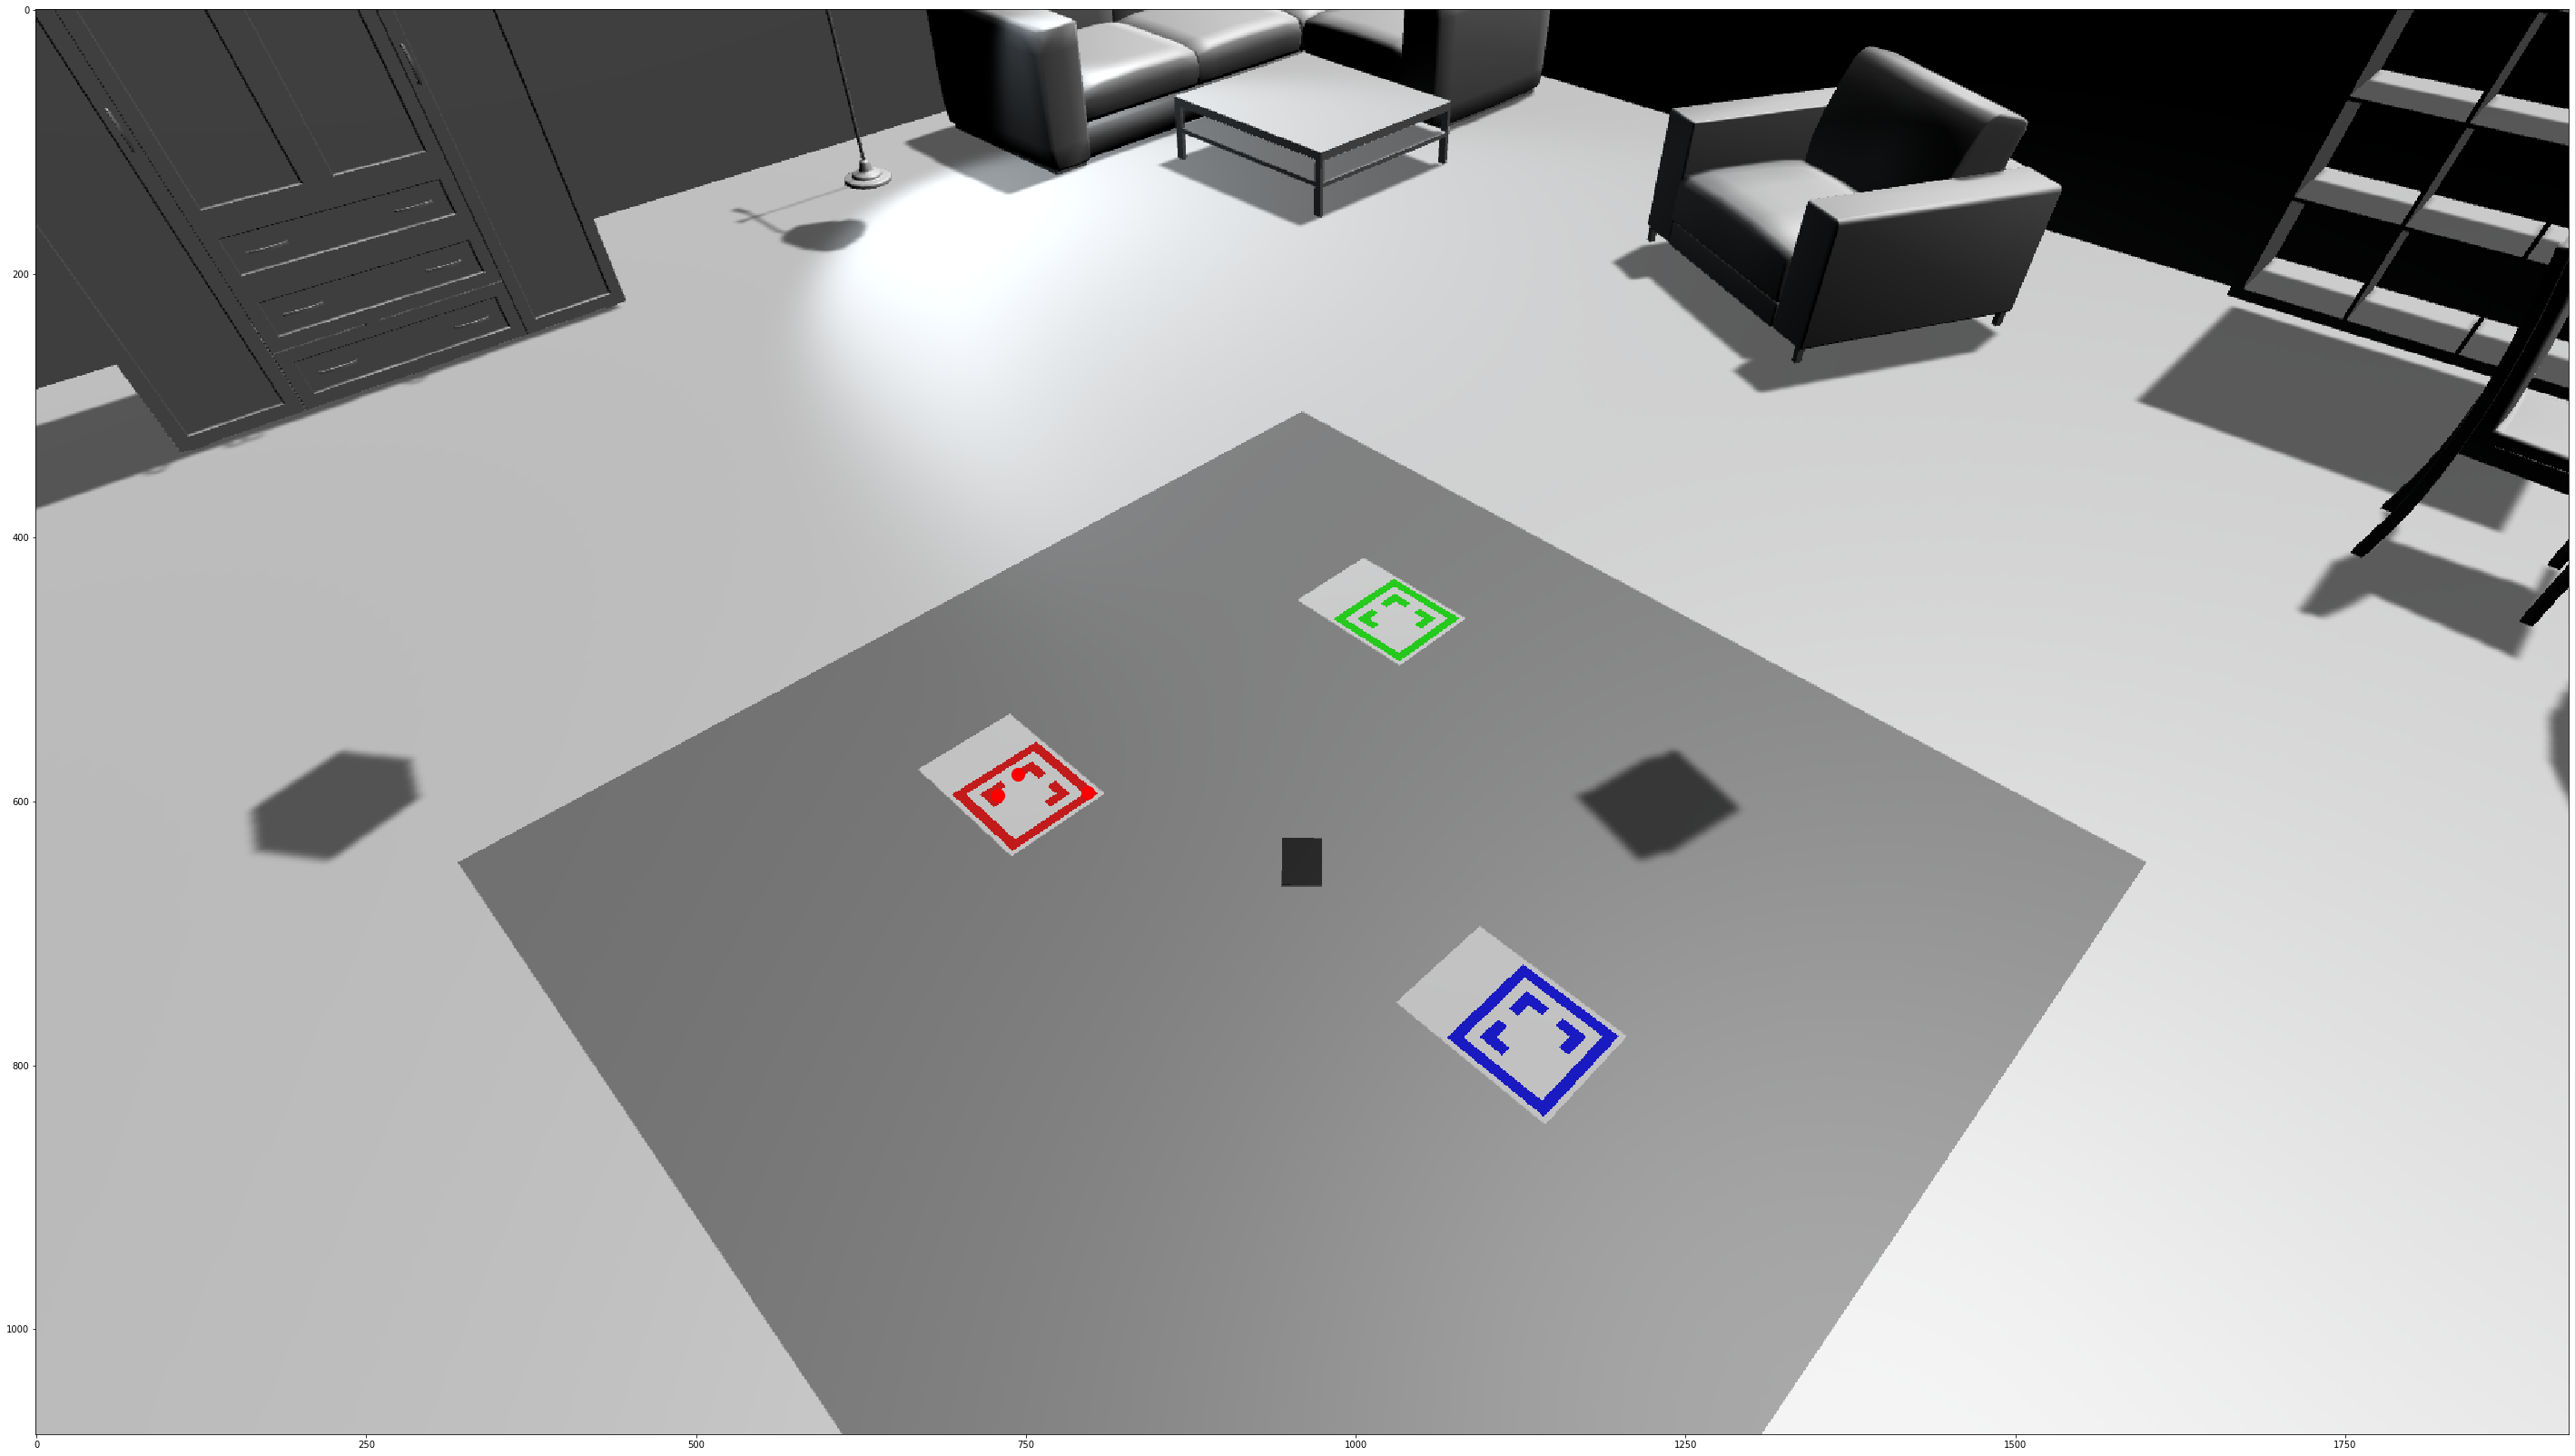

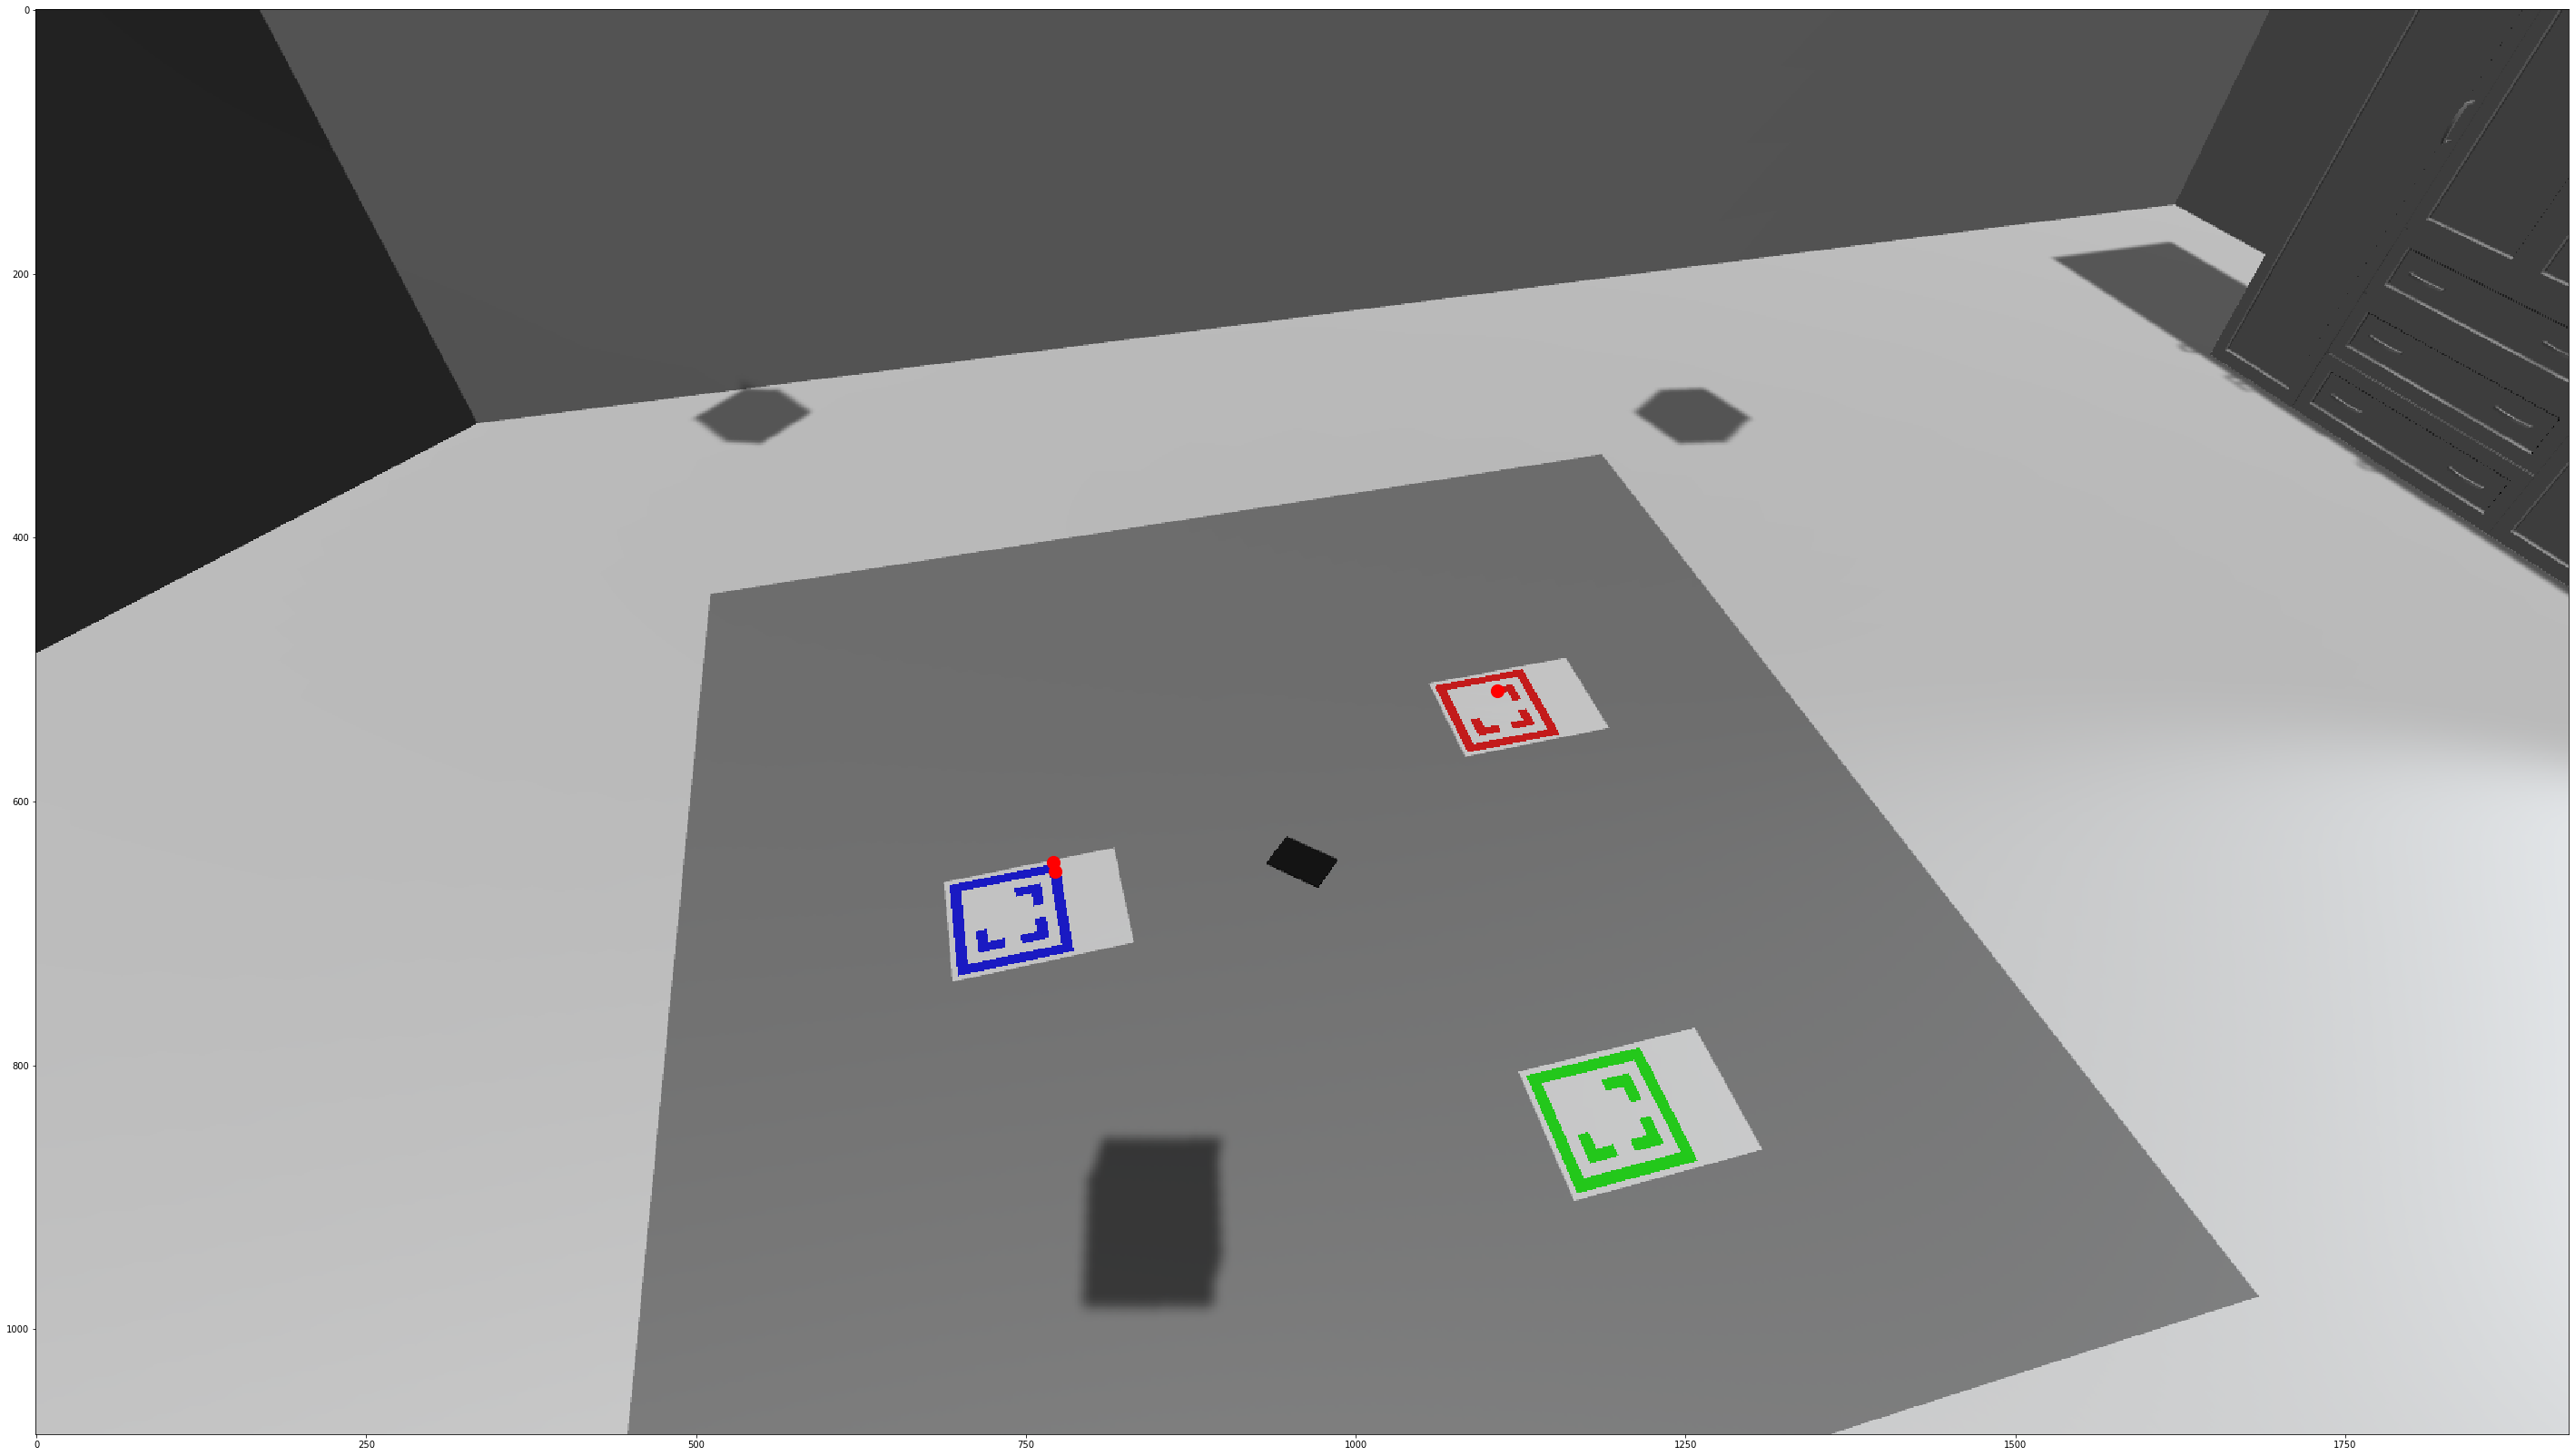

In [25]:
# idx = 50
# print(pts2[idx])
# print(pts2[idx])
# xc = [pts2[idx][0]]
# yc = [pts2[idx][1]]
# plt.figure(figsize=(50,50))
# #plt.subplot(121),
# plt.scatter(xc,yc,c='red',s=200)
# plt.imshow(img2)
#plt.figure(figsize=(50,50))

pointsIdx1 = [6,13,25]
pointsIdx2 = [56,50,13]
pts1_normalize = []
pts2_normalize = []
pts1_ = []
pts2_ = []
xct1 = []
yct1 = []
xct2 = []
yct2 = []
for i in pointsIdx1: 
    pts1_normalize.append(pts1_normalized[i])
    pts1_.append(pts1[i])
    xct1.append(pts1[i][0])
    yct1.append(pts1[i][1])
    
for i in pointsIdx2: 
    pts2_normalize.append(pts2_normalized[i])
    pts2_.append(pts2[i])
    xct2.append(pts2[i][0])
    yct2.append(pts2[i][1])
    
plt.figure(figsize=(50,50))
plt.scatter(xct1,yct1,c="red",s=200)
plt.imshow(img1)
plt.figure(figsize=(50,50))
plt.scatter(xct2,yct2,c="red",s=200)
plt.imshow(img2)

#print(pts1_normalized)
print(pts1_normalize)
print(pts2_normalize)
print(pts1_)
print(pts2_)

In [26]:
pts1_normalized_opt,pts2_normalized_opt = cv2.correctMatches(F,np.array([pts1_normalized]),np.array([pts1_normalized]))

In [27]:
pts1Arr = np.array(pts1_normalized_opt).T
pts2Arr = np.array(pts2_normalized_opt).T

points4D = cv2.triangulatePoints(PA, PE, pts1Arr,pts2Arr).T
print("Points 4D : ")
print(points4D)
print('\n')

points3d = cv2.convertPointsFromHomogeneous(points4D)
points3d = points3d.tolist()
points3d = list(map(lambda array: array[0],points3d))
print("Points 3D : ")
print(points3d)
print('\n')

points = list(map(lambda pt: pt[:][:3]/pt[3],points4D))
print("Points 3D : ")
print(points)

Points 4D : 
[[-0.99423372  0.10268833  0.01006717  0.02920744]
 [-0.99423305  0.1026947   0.01006729  0.02920763]
 [-0.99423305  0.1026947   0.01006729  0.02920763]
 [-0.99423289  0.10269631  0.01006727  0.02920748]
 [-0.99423289  0.10269631  0.01006727  0.02920748]
 [-0.99423289  0.10269632  0.01006727  0.02920748]
 [-0.99423282  0.10269703  0.01006728  0.02920748]
 [-0.99423283  0.10269693  0.01006728  0.02920747]
 [-0.99423283  0.10269693  0.01006728  0.02920747]
 [-0.9942329   0.10269619  0.01006726  0.02920743]
 [-0.99423275  0.10269769  0.01006729  0.0292075 ]
 [-0.99423276  0.10269761  0.01006729  0.0292075 ]
 [-0.99423276  0.10269761  0.01006729  0.0292075 ]
 [-0.99423283  0.1026969   0.01006727  0.02920746]
 [-0.99423274  0.10269779  0.01006729  0.0292075 ]
 [-0.99423279  0.10269729  0.01006728  0.02920748]
 [-0.99423274  0.10269779  0.01006729  0.0292075 ]
 [-0.99423284  0.1026968   0.01006727  0.02920745]
 [-0.99423285  0.10269668  0.01006727  0.02920744]
 [-0.9942328   0.1

In [40]:
listImgPoints = []
listX = []
listY = []
#for (rvec,tvec) in zip(rvecsA, tvecsA):
imgPoints, jacobian = cv2.projectPoints(np.array(points3d).transpose(),rvecsA[0],tvecsA[0],mtxA,0)
imgPoints = list(map(lambda points: points[0],imgPoints))
print("Points 2D from Points 3D : ")
print(imgPoints)
print("\n")
x = list(map(lambda points: points[0],imgPoints))
y = list(map(lambda points: points[1],imgPoints))
listImgPoints.append(imgPoints)
listX.append(x)
listY.append(y)

# imgPoints, jacobian = cv2.projectPoints(np.array(points3d).transpose(),rvecsZ[6],tvecsZ[6],mtxZ,0)
# imgPoints = list(map(lambda points: points[0],imgPoints))
# print("Points 2D from Points 3D : ")
# print(imgPoints)
# xP = list(map(lambda points: points[0],imgPoints))
# yP = list(map(lambda points: points[1],imgPoints))

Points 2D from Points 3D : 
[array([541.52435799, 223.23082713]), array([541.52454118, 223.23098747]), array([541.52454118, 223.23098747]), array([541.52463059, 223.23103619]), array([541.52463059, 223.23103619]), array([541.52463093, 223.2310364 ]), array([541.5246561 , 223.23105518]), array([541.52465367, 223.2310527 ]), array([541.52465367, 223.2310527 ]), array([541.52463623, 223.23103477]), array([541.52467396, 223.23107144]), array([541.52467226, 223.23106956]), array([541.52467226, 223.23106956]), array([541.52465479, 223.23105226]), array([541.52467748, 223.23107411]), array([541.52466519, 223.23106199]), array([541.52467802, 223.23107421]), array([541.52465406, 223.23105023]), array([541.52465124, 223.23104736]), array([541.52466668, 223.23106113]), array([541.52466668, 223.23106113]), array([541.52467141, 223.23106576]), array([541.52467141, 223.23106576]), array([541.52467465, 223.23106695]), array([541.52467232, 223.23106401]), array([541.52467799, 223.23106911]), array([54

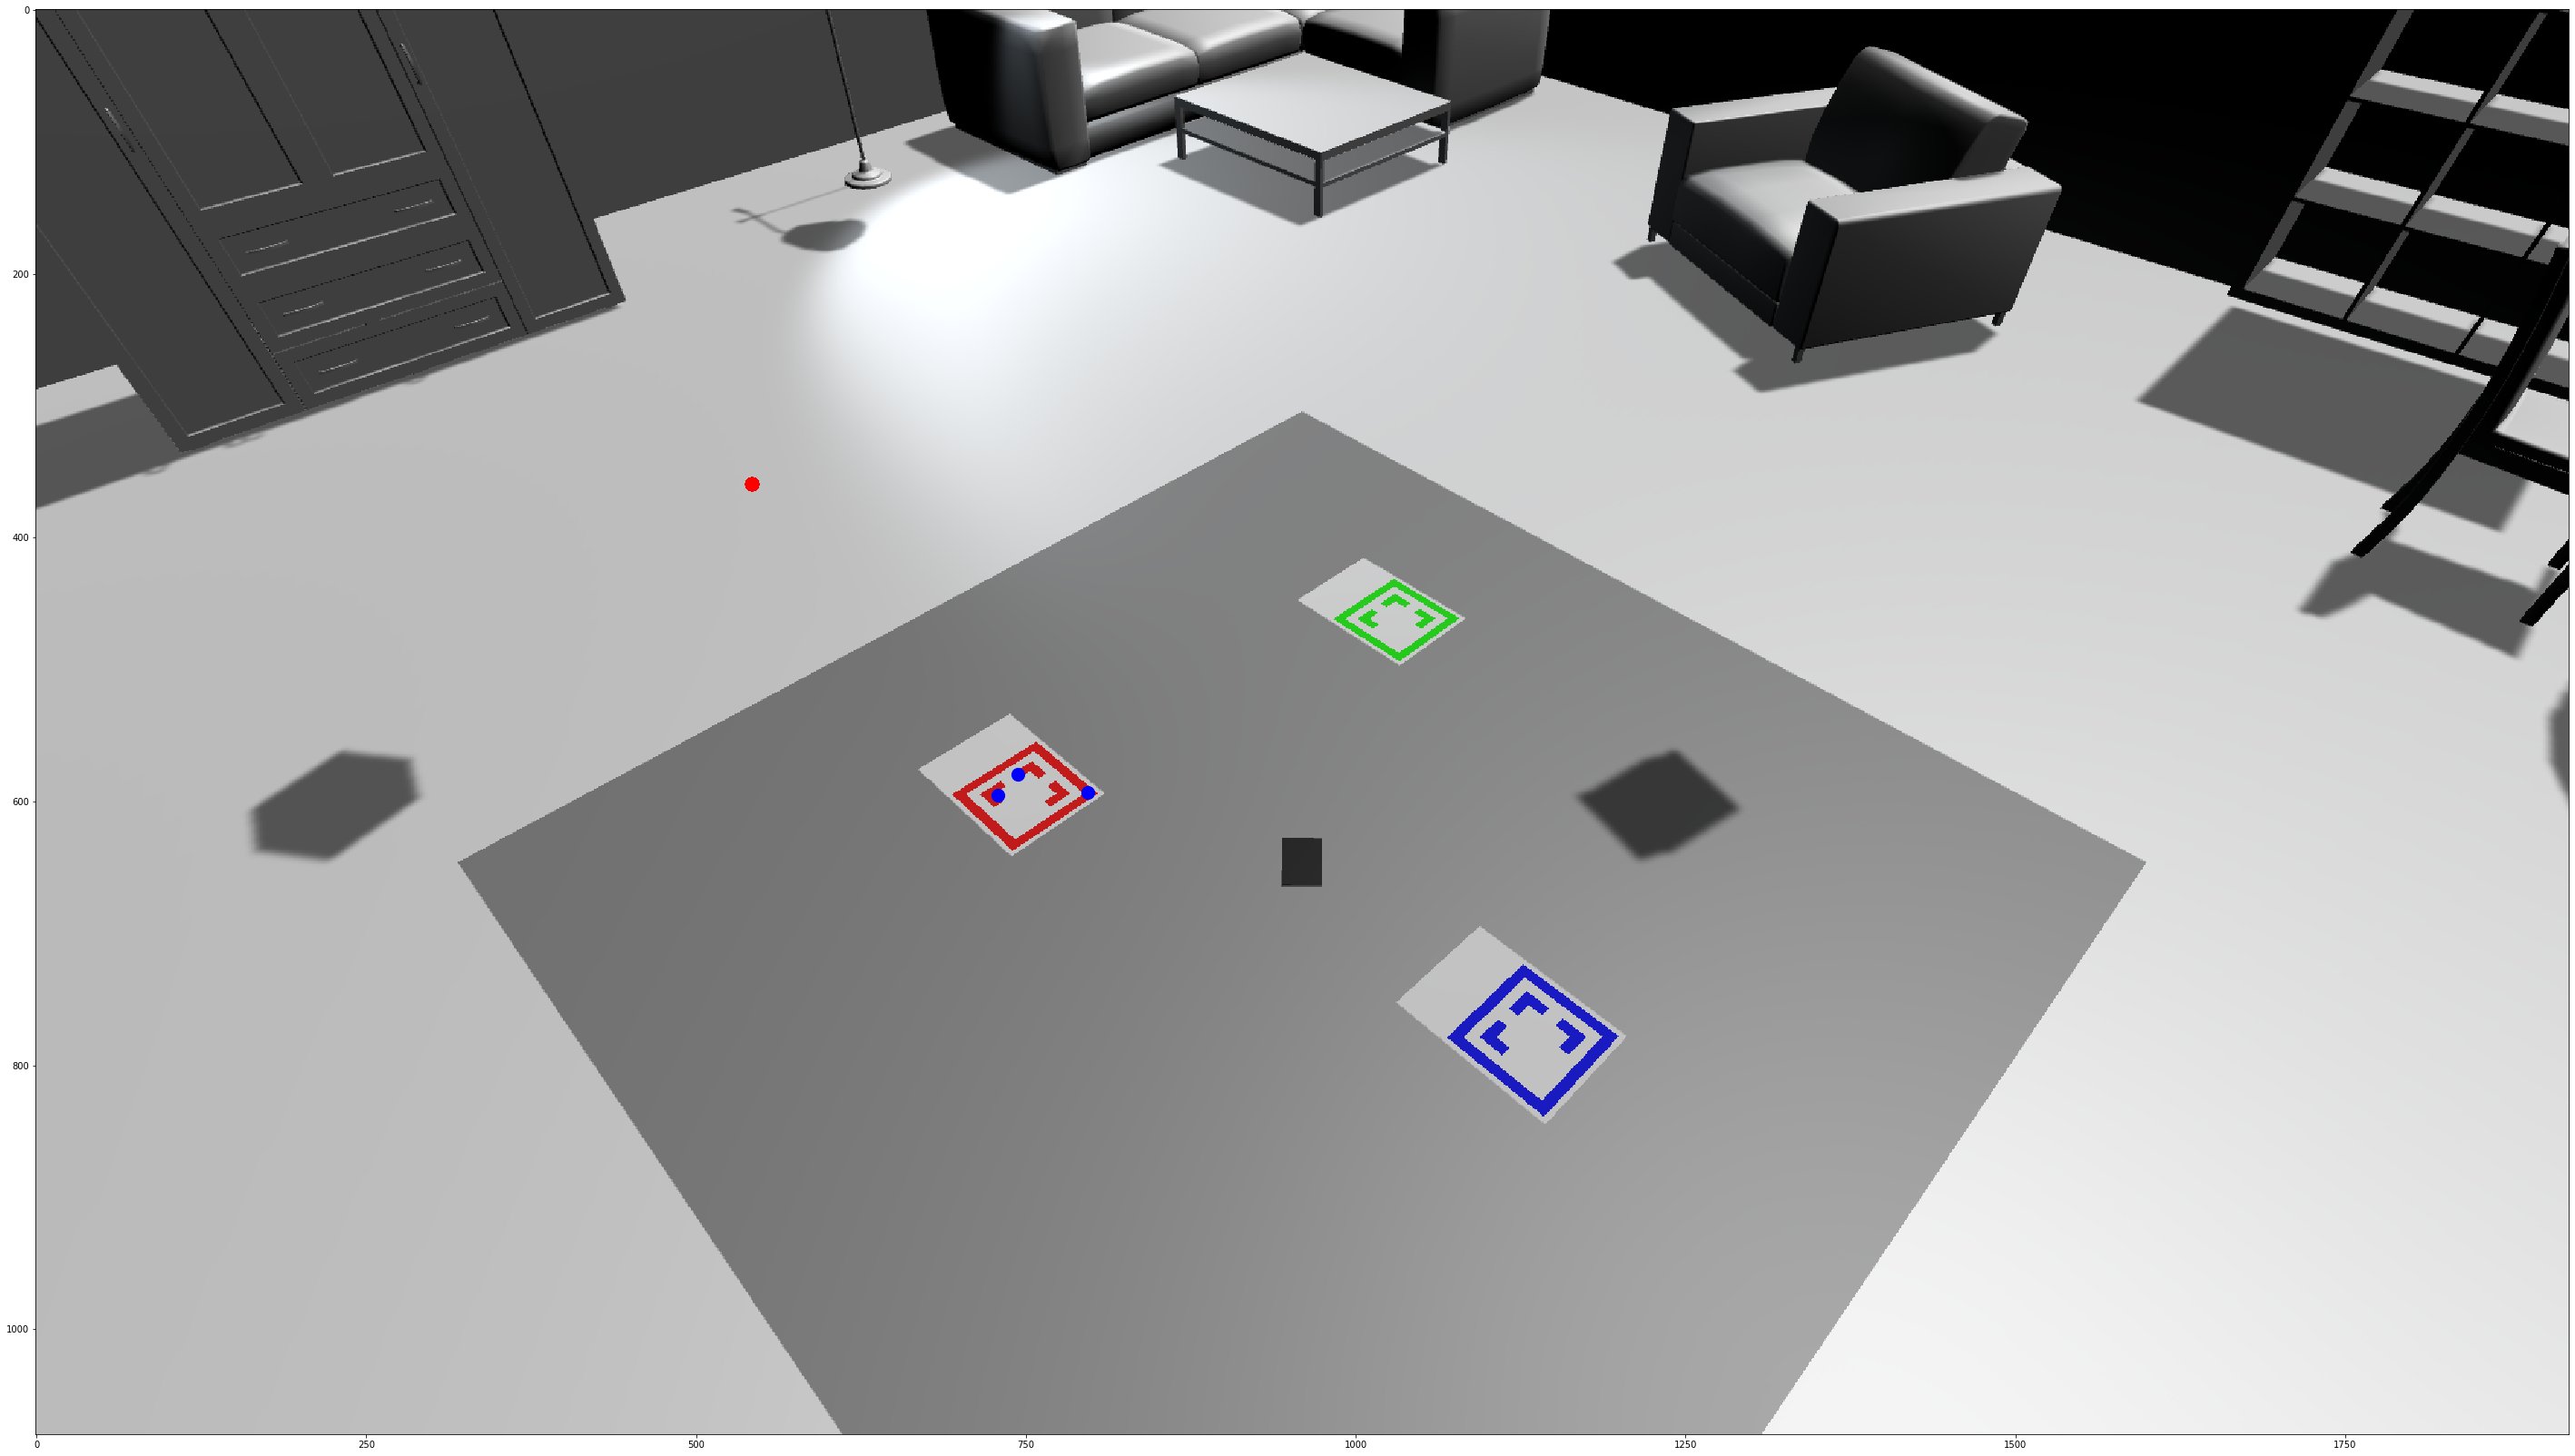

In [37]:
plt.figure(figsize=(50,50))
plt.scatter(xct1,yct1,c="blue",s=200)
for x,y in zip(listX,listY):
    plt.scatter(x,y,c='red',s=200)
plt.imshow(img1)
# plt.figure(figsize=(50,50))
# plt.scatter(xct2,yct2,c="blue",s=200)
# plt.scatter(xP,yP,c='red',s=200)
# plt.imshow(img2)
# plt.show()

[0.976322051834058, 0.9807827658504954, 1.0]


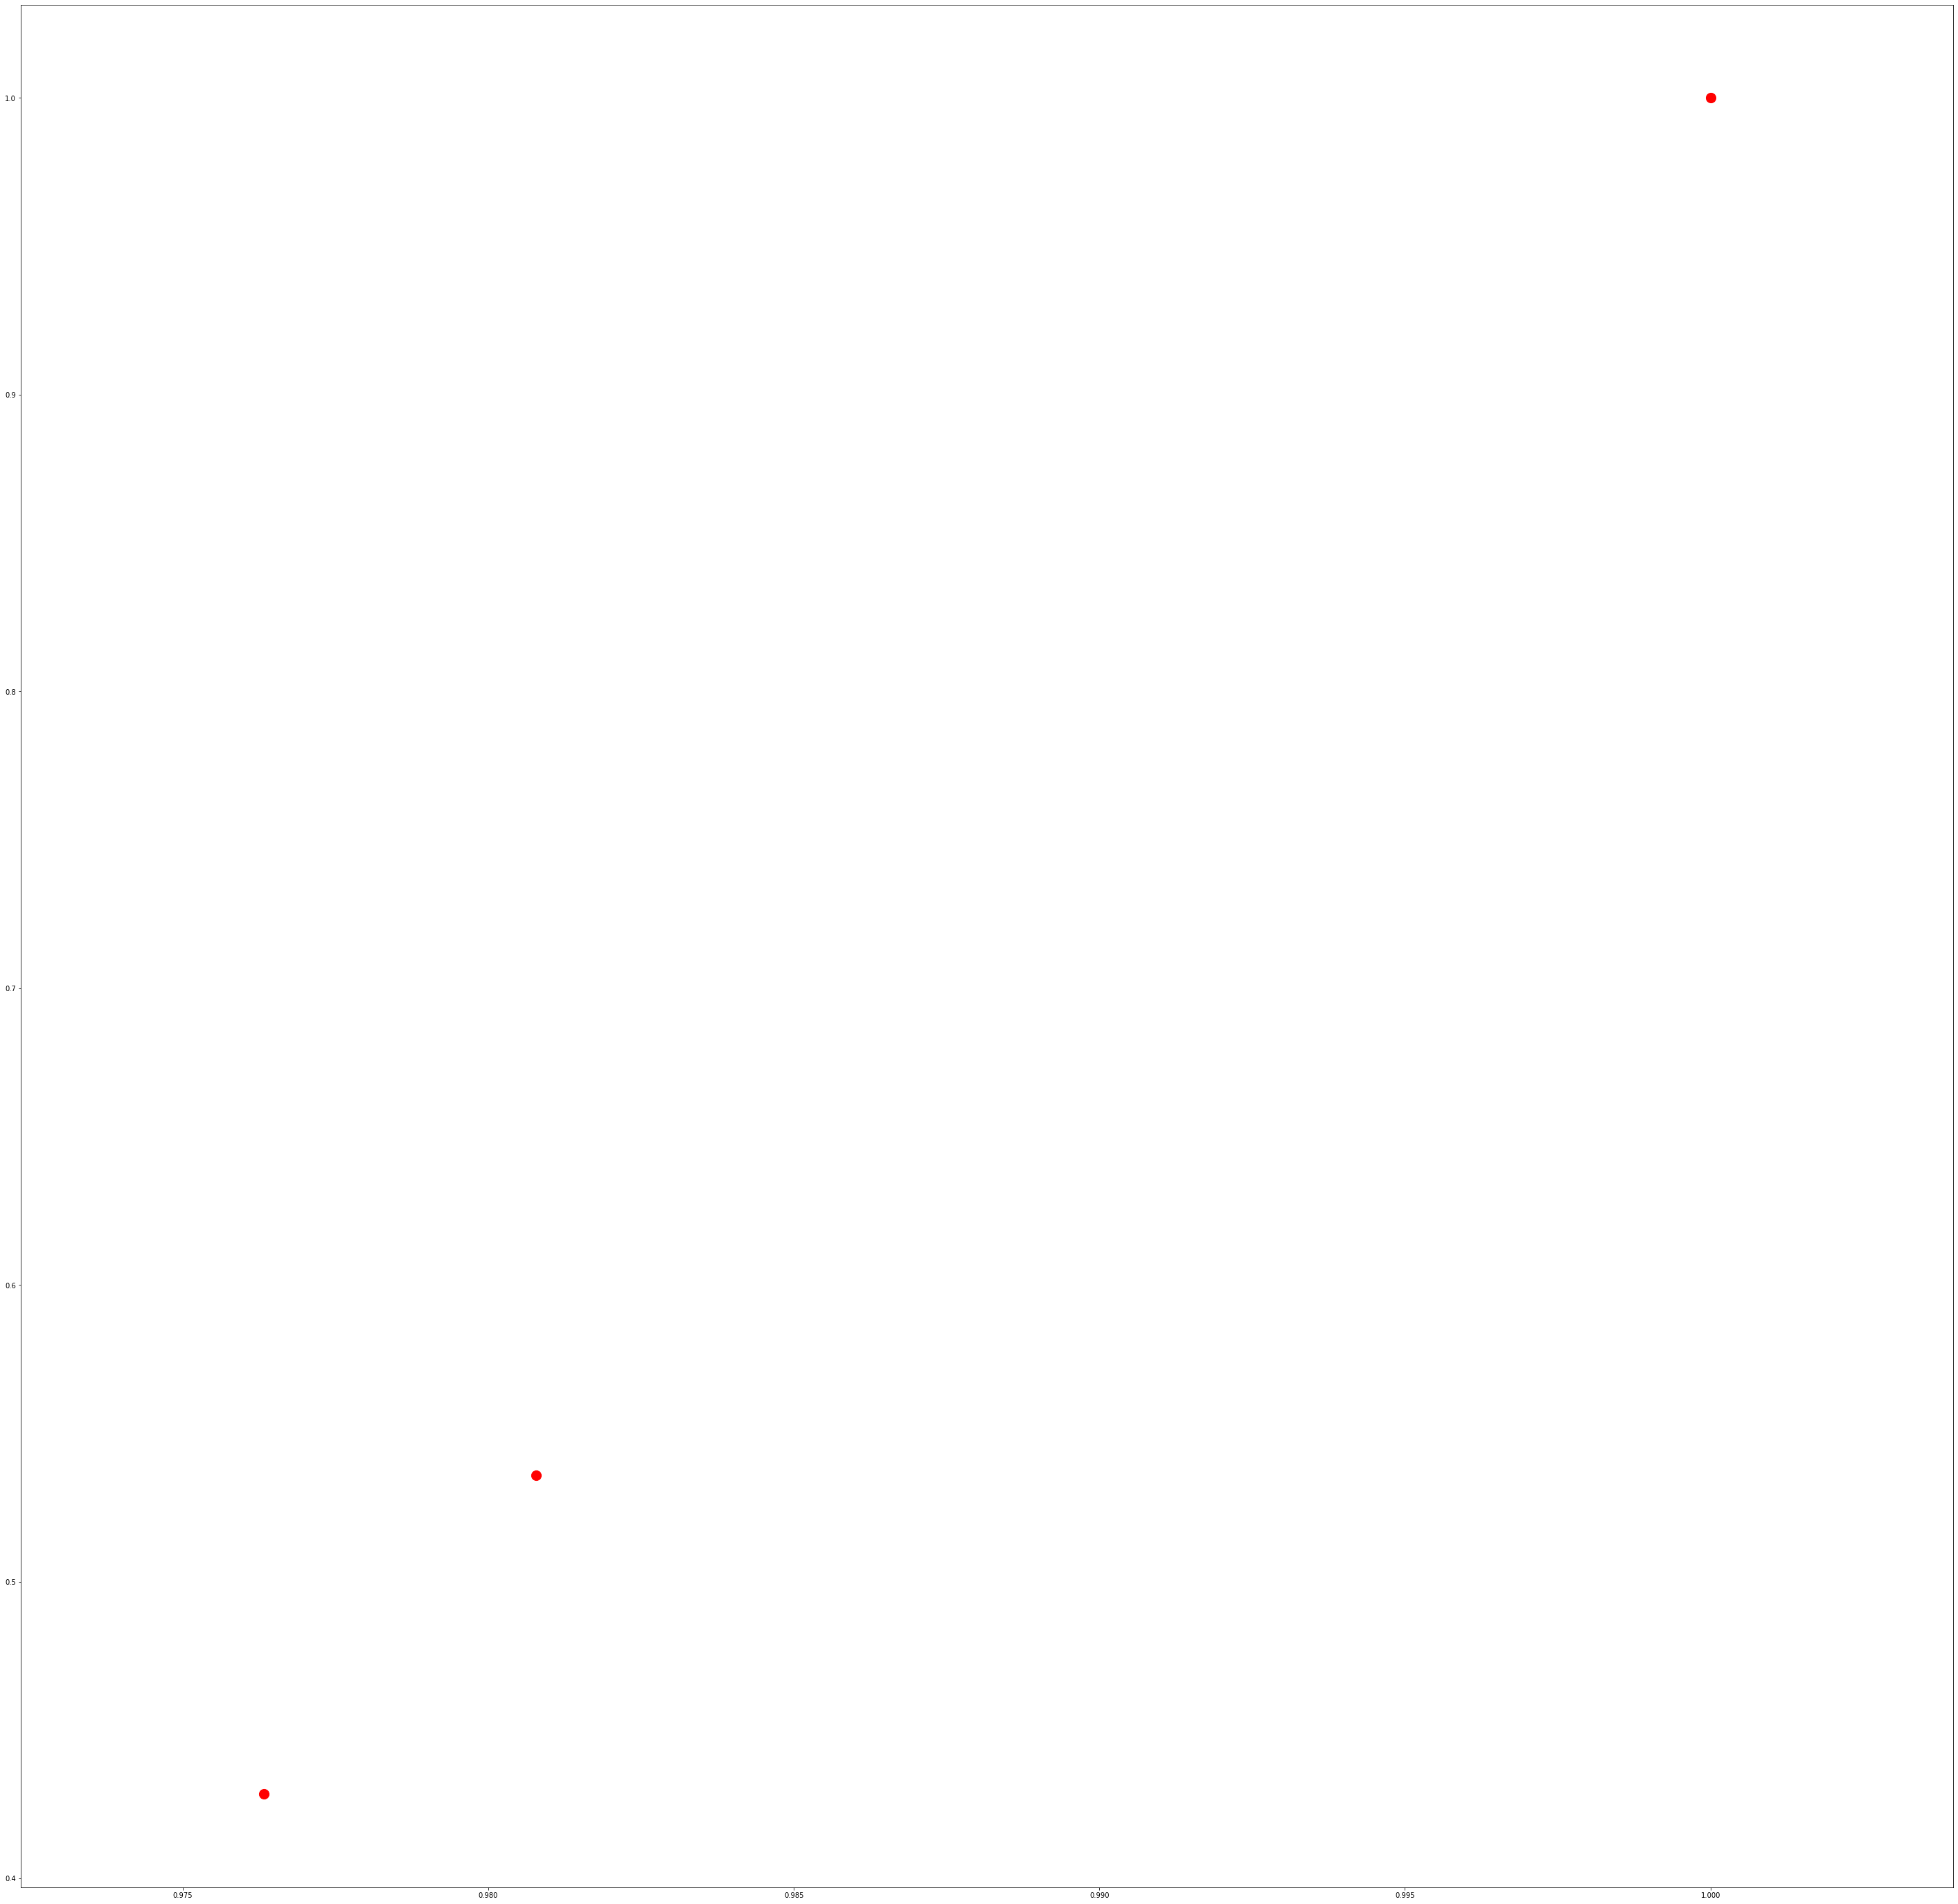

In [42]:
x = list(map(lambda cx: cx/max(x),x))
y = list(map(lambda cy: cy/max(y),y))
print(x)
plt.figure(figsize=(50,50))
#plt.subplot(121),
plt.scatter(x,y,c='red',s=200)
plt.show()